## Analysis of Variance (ANOVA)
_source: Wikipedia_

Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among group means in a sample.

ANOVA was developed by statistician and evolutionary biologist Ronald Fisher.

In the ANOVA setting, the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether the population means of several groups are equal, and therefore generalizes the t-test to more than two groups.

ANOVA is useful for comparing (testing) three or more group means for statistical significance. It is conceptually similar to multiple two-sample t-tests, but is more conservative, resulting in fewer type I errors, and is therefore suited to a wide range of practical problems.

https://en.wikipedia.org/wiki/Analysis_of_variance  

----

The purpose of ANOVA is to determine whether the variation between the groups is due simply to randomness. ANOVA analyizes the factors and levels within the data. 
 - Factor describes the cause of the variation in the data
 - Level describes a category within the factor of interest
 
ANOVA is used to determine how one factor impacts a response variable. For example, we might want to know if three different call centres have different wait times. We can use ANOVA to see if there is a statistically significant difference in mean wait time. __Factor__ would be location. __Levels__ would be each of the call centres.
 
ANOVA relies on the following sets of assumptions:
 - each population follows the normal probability distribution
 - observations must be independant of one another
 - populations being compared have equal variances
 - the observations are either interval or ratio data
 

ANOVA is used to compare to determine if there is a difference. Some examples are
 - Average waiting time on various traffic signals (not the traffic light timing, but the waiting time depending on traffic)
 - Average time to reach a customer service agent when calling into a customer service center (banks, cell phone company)
 - Pollution levels at different times of day
 - Study the change of body temperature before and after exercise
 - Delivery time for pizza or groceries in different parts of the city
 - Patient registration time at various hospitals in the city

### Install Packages and Import Libraries
Typically packages and libraries are compiled at the start of the code so it's easier to read and understand what is used; however, it's acceptable to install or import at any point in your code.

First, we would normally install the packages. Using mybinder.org, the packages are installed at execution time, so this code is not needed in these tutorials. If you download and run this notebook, you may need to install the packages.

In [1]:
# This is normally where you'd type the code to install the packages required. 

# !pip install numpy
# !pip install matplotlib
# !pip install scipy
# !pip install pandas

#### Package information for curious minds:
https://numpy.org/devdocs/user/absolute_beginners.html  
https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py  
https://www.scipy.org/getting-started.html  
https://pandas.pydata.org/docs/getting_started/10min.html

Next we will import the libraries we need.

In [2]:
# run this cell
import numpy as np

> We shorten _numpy_ to _np_ in order to save time and also to keep code standardized so that anyone working with your code can easily understand and run it.

In [3]:
# run this cell
import matplotlib.pyplot as plt
%matplotlib inline

> We provided an alias for _matplotlib.pyplot_ so that we can use _plt_ throughout the code instead of typing matplotlib.pyplot each time. We also specified that we want matplotlib to provide inline plots, that is to plot them in the notebook.


In [4]:
# run this cell
import scipy.stats as stats

> In the cell below, describe what  _stats_ references.

In [5]:
# Comment the answer here:
# stats references scipy.stats so it doesn't have to be typed 

Finally, import pandas with the alias "pd".  
><font color=green>__import__</font> pandas <font color=green>__as__</font> pd

In [6]:
# type the code to import pandas below:
import pandas as pd


#### Null Hypothesis
ANOVA is a hypothesis test. The null hypothesis that the mean is the same for all groups of data. The alternative hypothesis is that the means are not equal, which means at least one group is not equal to the others (without detail on whether it's one or more groups which vary from the others).

Our example will analyize salaries of people who have degrees in Economics (e), Medicine (m), or History (h).  
The null hypothesis is that all the means are equal. This can be expressed as:
##### H<sub>0</sub> : $\mu$<sub>e</sub> = $\mu$<sub>m</sub> = $\mu$<sub>h</sub>

----

Which means the alternative hypothesis is not all means are equal, meaning at least one group is different.
##### H<sub>1</sub> : Means are not all equal
----
We start by assuming the null hypothesis is true. If the null is true, we know what to expect to show up in the data - that is the means are all the same. In our example, we are testing that the mean salary is the same for each of the disciplines. 

If we end up rejecting the null hypothesis, then we know there is evidence that at least one group of data is different than the rest. Once that is established, more analysis can be done on the data.

#### Our Sample Data
The first step is to input the values. For this example, we are typing in the values rather than importing a file.

Our data represents the salaries of people who have degrees in Economics, Medicine and History. We will use the the first letter of each degree to represent the group of data. 

 - Xe: economics
 - Xm: medicine
 - Xh: history
 
Our null hypothesis is that all the means are equal for all groups of data. (Which is saying that the average salary is the same regardless of the degree)

In [7]:
# Run this cell to import the salaries

# Xe: economics, Xm: medicine, Xh: history

Xe = [42, 43, 44, 45, 49, 52, 53, 53, 54]
Xm = [54, 55, 56, 58, 64, 64, 69]
Xh = [35, 39, 39, 40, 40, 42, 50, 53, 55]

Now that we have added the salaries, we can add them to a plot.

#### Plot the data
Let's start with a simple boxplot and ask for the plot to display.  
>`plt.boxplot([Xe, Xm, Xh])`  
`plt.show()`

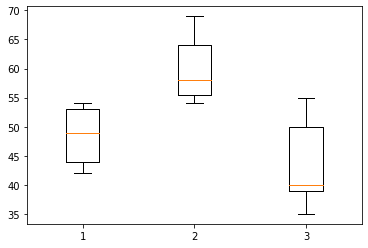

In [8]:
# Enter the code to plot the data and show the result
plt.boxplot([Xe, Xm, Xh])
plt.show()

You should see the three sets of scores plotted.  
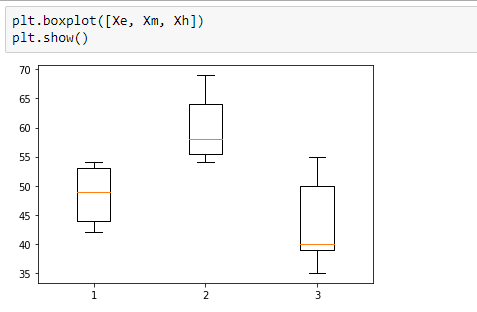  

#### Summarize the Data
Next, let's use some Python functions to summarize the data.
We are going to assign the results of each function to a variable, starting with the Economics data. 

>`Xe_count = len(Xe)`The length of the data, or number of value using the base Python function.  
>`Xe_sum = sum(Xe)` The sum of values using the base Python function.  
>`Xe_mean = np.mean(Xe)` The mean or average using the Numpy function.    
>`Xe_var = np.var(Xe, ddof = 1)` The variance within the group using the Numpy function.  
>`Xe_std = np.std(Xe, ddof = 1)` The standard deviation within the group using the Numpy function.  
>`Xe_sse = sum((Xe - Xe_mean)**2)` The _Sum of Square Error for this group of data. Note that we have created our own formula to calculate.  

_ddof_ represents the Delta Degrees of Freedom, usually represented as _n-1_ for sample data. The default value is 0. In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of the infinite population. 

In [9]:
# xe summary code
Xe_count = len(Xe)
Xe_sum = sum(Xe)
Xe_mean = np.mean(Xe)
Xe_var = np.var(Xe, ddof = 1)
Xe_std = np.std(Xe, ddof = 1)
Xe_sse = sum((Xe - Xe_mean)**2)

Next, we will display the results.  
>`print('count:', Xe_count)`  
>`print('sum:', Xe_sum)`  
>`print('mean:', Xe_mean)`  
>`print('var:', Xe_var)`  
>`print('std:', Xe_std)`  
>`print('SSE:', Xe_sse)`  

In [10]:
# display the results
print('count:', Xe_count)
print('sum:', Xe_sum)
print('mean:', Xe_mean)
print('var:', Xe_var)
print('std:', Xe_std)
print('SSE:', Xe_sse)

count: 9
sum: 435
mean: 48.333333333333336
var: 23.5
std: 4.847679857416329
SSE: 188.0


Repeat the code for the other two groups of data, using _Xm_ for Medicine and _Xh_ for History.  
Display the results for each.

In [11]:
# Xm summary
Xm_count = len(Xm)
Xm_sum = sum(Xm)
Xm_mean = np.mean(Xm)
Xm_var = np.var(Xm, ddof = 1)
Xm_std = np.std(Xm, ddof = 1)
Xm_sse = sum((Xm - Xm_mean)**2)


In [12]:
# display the results
print('count:', Xm_count)
print('sum:', Xm_sum)
print('mean:', Xm_mean)
print('var:', Xm_var)
print('std:', Xm_std)
print('SSE:', Xm_sse)

count: 7
sum: 420
mean: 60.0
var: 32.333333333333336
std: 5.686240703077327
SSE: 194.0


In [13]:
# Xh summary
Xh_count = len(Xh)
Xh_sum = sum(Xh)
Xh_mean = np.mean(Xh)
Xh_var = np.var(Xh, ddof = 1)
Xh_std = np.std(Xh, ddof = 1)
Xh_sse = sum((Xh - Xh_mean)**2)



In [14]:
# display the results
print('count:', Xh_count)
print('sum:', Xh_sum)
print('mean:', Xh_mean)
print('var:', Xh_var)
print('std:', Xh_std)
print('SSE:', Xh_sse)

count: 9
sum: 393
mean: 43.666666666666664
var: 50.5
std: 7.106335201775948
SSE: 404.0


#### Standard Normal Distribution
The standard normal distribution simply converts the group of data in our frequency distribution such that the mean is 0 and the standard deviation is 1. 
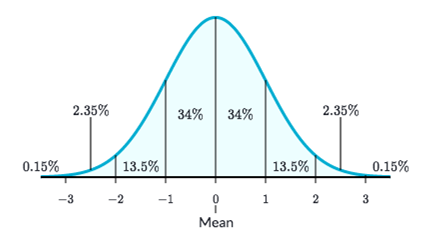

Using the summary data, we will now plot the data on a line chart to represent the distribution for each group.


To plot the Xe Economic data, use the following code:
>`mu = Xe_mean` _mu_ represents the mean  
>`variance = Xe_var` the variance  
>`sigma = Xe_std` _sigma_ represents the standard deviation    
>`x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)`  Defining x using numpy.linspace, which passes the arguments for the start, stop and numbers within the data to return evenly spaced numbers.  
>`plt.plot(x, stats.norm.pdf(x, mu, sigma), label = 'economics')`   
> Plots a line graph with the variables we created using the stats function for norm.pdf (the probability density function for norm).    
  
We can plot multiple data on the same plot by indicating the information to plot before showing the final result. All the code will be in one cell.
> Repeat the code for the Xm and Xh groups, replacing `Xe` and `economics` with the correct references.

Finally, we add a title and legend and then show the final plot.
>`plt.title('ANalysis Of VAriance (ANOVA)')`  
>`plt.legend()`  
>`plt.show()`  

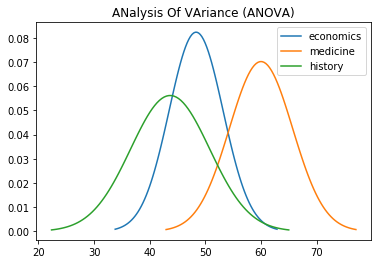

In [15]:
# Enter in the code to plot all three groups (Xe,Xm, Xh) as well as the code to add the title and legend, and to show the plot.

mu = Xe_mean
variance = Xe_var
sigma = Xe_std
x = np.linspace(mu - 3*sigma, mu +3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label = 'economics')

mu = Xm_mean
variance = Xm_var
sigma = Xm_std
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label = 'medicine')

mu = Xh_mean
variance = Xh_var
sigma = Xh_std
x = np.linspace(mu - 3*sigma, mu +3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label = 'history')

plt.title('ANalysis Of VAriance (ANOVA)')
plt.legend()
plt.show()

The result should appear as:
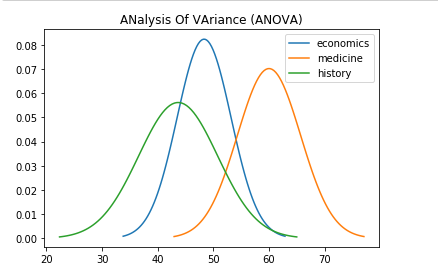

If the plot does not match, go back and double-check that you have entered the correct variables for each group of code. Edit and run the cell again to make sure it is correct.

#### Define a custom function
Next, we will create our own function to replicate the plot using less code. Creating our own function breaks out the individuals compontents and avoids repetition. This function uses the same code we used in the step above, but instead of defining each variable, we pass the variables we created as arguments in the function.

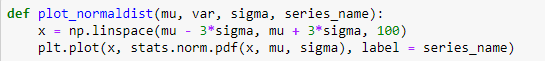

_Be sure to keep the white space._   
When you hit enter after the colon, it will automatically indent the next line of code to ensure that the proper tabbing is in place. 


In [16]:
# Enter the code for the function below:

def plot_normaldist(mu, var, sigma, series_name):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label = series_name)

To plot the Xe Economic data, using the function, we now need only 1 line of code instead of 5:

>`plot_normaldist(Xe_mean, Xe_var, Xe_std, 'economics')`

Just like before, we can plot multiple data on the same plot by indicating the information to plot before showing the final result. All the code will be in one cell.
> Repeat the code for the Xm and Xh groups, replacing `Xe` and `economics` with the correct references.

Finally, we add a title and legend and then show the final plot.  
>`plt.title('ANalysis Of VAriance (ANOVA)')`  
>`plt.legend()`  
>`plt.show()`  

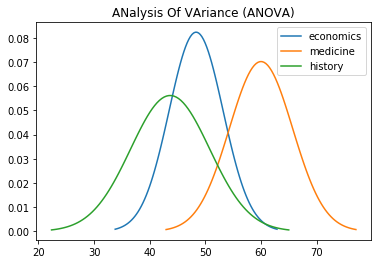

In [17]:
# Use the function to plot the data for Xe, Xm, Xh
plot_normaldist(Xe_mean, Xe_var, Xe_std, 'economics')
plot_normaldist(Xm_mean, Xm_var, Xm_std, 'medicine')
plot_normaldist(Xh_mean, Xh_var, Xh_std, 'history')

plt.title('ANalysis Of VAriance (ANOVA)')
plt.legend()
plt.show()

#### Summarize the observations of all data

Now we will summarize all the data from all the groups.

>`X = np.concatenate((Xe, Xm, Xh))`makes one long list of the data   
>`X_count = len(X)`counts the total observations   
>`X_sum = sum(X)`sum of the data   
>`X_mean = np.mean(X)`mean of the data   
>`X_var = np.var(X, ddof = 1)`variance of the data  
>`X_std = np.std(X, ddof = 1)`standard deviation of the data   
>`X_sse = sum((X - X_mean)**2)`sum of square error

In [25]:
# type the code to summarize the observations
X = np.concatenate((Xe, Xm, Xh))
X_count = len(X)
X_sum = sum(X)
X_mean = np.mean(X)
X_var = np.var(X, ddof = 1)
X_std = np.std(X, ddof = 1)
X_sse = sum((X - X_mean)**2)


ANOVA analyizes the variance in two parts: between group and within group.
 
Sum of Squares Between __SSB__ looks at differences between the groups - comparing the mean of each group to the overall mean of all observations. If Economics degrees pay better than History, that could explain the differences in the means between Economics and History. 

Sum of Squares Within __SSW__ looks at the differences within the groups - comparing the difference for each value within one group to the mean of that group. Economics pays better than History, but why the swing in values within the Economics group. It's not explained by the category. 

First we will use Sum of Squares Within (SSW) and Sum of Squares Between (SSB) to compare the variance.

>`SST = X_sse` SST = Sum of Squares Columns Total. This is the SSE of the summary (all observations).  
>`SSW = Xe_sse + Xm_sse + Xh_sse` SSW = Sum of Squares Within. This is the sum of the SSE of each group.  
>`SSB = SST - SSW` Sum of Squares Between. This calculates the difference of the SS from all observations and the SS from each observation.  


In [26]:
# type the code to create SST, SSW and SSB
SST = X_sse
SSW = Xe_sse + Xm_sse + Xh_sse
SSB = SST - SSW

Next, we print the variables we created.
>`print('obs:', X_count)`  
>`print('total_sum:', X_sum)`  
>`print('mean:', X_mean)`  
>`print('var:', X_var)`  
>`print('std:', X_std)`  
>`print('SSW:', SSW, 'SSB:', SSB, 'SST:', SST)` 

In [20]:
# type the code to display the summary data

print('obs:', X_count)
print('total_sum:', X_sum)
print('mean:', X_mean)
print('var:', X_var)
print('std:', X_std)
print('SSW:', SSW, 'SSB:', SSB, 'SST:', SST)




obs: 25
total_sum: 1248
mean: 49.92
var: 77.99333333333334
std: 8.831383432584802
SSW: 786.0 SSB: 1085.8400000000001 SST: 1871.8400000000001


Next we will look at the degrees of freedom for the observations. We require the degrees of freedom to calculate the F ratio for SSB and SSW.

>`C = 3` this represents the number of groups (or columns)  
>`N = X_count` this is the total number of observations (the count of all data)  
>`df_b = C -1` the degrees of freedom between is the number of groups minus 1 (n - 1)  
>`df_w = N - C` the degrees of freedom within is the total observations minus the number of groups  
>`df = df_b + df_w` the total degrees of freedom is the sum of degrees between plus the degrees within


In [21]:
# type the code to calculate the degrees of freedom
C = 3
N = X_count
df_b = C-1
df_w = N-C
df = df_b + df_w


### Calculate the F-ratio

F-ratio measures the ratio of between-column variance and within-column variance. If there is a real difference between the groups the variance between groups will be significantly larger than the variance within the groups.

The formula for the one-way ANOVA F-test statistic is $ F={\frac {\text{between-group variability}}{\text{within-group variability}}}$



### Wait...F-ratio....F-statistic....F-critical....F-value..F-test statistic
The terms "Calculated F", "F-value", "F-statistic", "F-test statistic" and "F-ratio" all mean the same calculated value:
$ {\frac {\text{between-group variability}}{\text{within-group variability}}}$

F-critical is different. We also use the between-group degrees of freedom and within-group degrees of freedom to calculate the F-critical value. We use the same between-group degrees of freedom and within-group degrees of freedom to calculate the p-value. Why are the same numbers used in different ways?

Let's say you want to compare the height of two of your friends.
  - Friend One tells you their height is 6'.
  - Friend Two tells you their height is 1.88m.  
  
Do you write down 6 > 1.88, meaning Friend One is taller? No, no, no!!! In order to compare the two heights, you will need to convert the feet to metres or metres to feet.

It is similar with test statistics, you _cannot compare your significance level to the F-statistic._

You need to either 
 - convert significance level to a critical value and compare the F-statistic to the critical value (F-critical)  
__or__   
 - convert your F-statistic to a p-value and compare the p-value to significance level.

It is common to do both calculations and compare the results, particularly if there is not enough evidence to reject the null hypothesis.

#### Understanding F-critical
The F-critical value is the inverse cumulative probability. It is determining how likely the F-ratio is if there is no difference in the means (if the null hypothesis is true).
 
If you know the the degrees of freedom for Between Groups and degrees of freedom for Within Groups, and the significance level, you can calculate the F-critical (or F-crit) value.  

Alternately, you could also use the F distribution table to look up the F-critical value. On the table for the significance level, look up the column for degrees of freedom for Between Groups and the row for degrees of freedom for Within Groups, the value where these intersect is your F-critical value. 
> The F-critical area is shaded. It represents the rejection zone for the null hypothesis. If your F-statistic is greater than this number, then F-statistic is improbable. You can see the shaded area starts where the distribution curve is 0.05%.
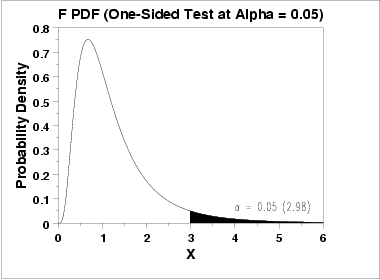




#### Understanding p-value
P-value indicates the probability of observed test statistics if the null hypothesis is true. To determine if the means are statistically significant, compare the p-value to the significance level, typically 0.05. A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.

To calculate the p-value you need the degrees of freedom for Between Groups and degrees of freedom for Within Groups. 

P-values can also be looked up on z-table, also know as Table of the Standard Normal Cumulative Distribution Function, which stores the probabilities for each z-value (which is the z-score or number of standard deviations from the mean). 

To convert the value to z-score, you need the mean and standard deviation. z = (x – mean)/std dev

> Recall that in standard distribution, the entire area under the curve represents 1 (or 100%). 
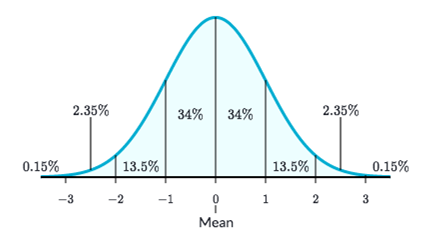



>Significance Level compared to Critical Value
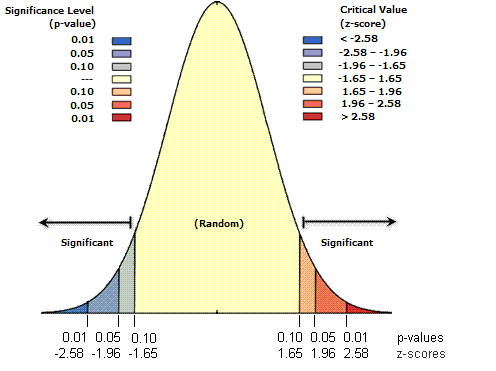

### Back to the F-statistic

F-statistic is the ratio of the between-group variability to the within-group variability. $ F={\frac {\text{between-group variability}}{\text{within-group variability}}}$

We can also write it this way: F = (SSB / df_between ) / (SSW / df_within)   

We will use built in functions to return the p-value and F-critical value, using the variables we created earlier.

>`F = ( SSB / df_b ) / ( SSW /  df_w )` 

_To compare to the significance level, F-statistic converted to p-value_
>`p_value = stats.f.sf( F, df_b, df_w )`  

_F-critical is the inverse probability. 1 - 0.05 (statistical significance) = 0.95_
>`F_crit = stats.f.ppf( 0.95, df_b, df_w )`  

Display the results.
>`print('F:', F)`  
>`print('p-value:', p_value)`  
>`print('F-crit:', F_crit)`  

In [22]:
# type the code to calculate and 
# display the values for F, p-value and F-critical

F = ( SSB / df_b ) / ( SSW /  df_w)
p_value = stats.f.sf( F, df_b, df_w )
F_crit = stats.f.ppf( 0.95, df_b, df_w )

print('F:', F)
print('p-value:', p_value)  
print('F-crit:', F_crit)


F: 15.196234096692114
p-value: 7.156357807176245e-05
F-crit: 3.4433567793667237


Finally, we will display the results in a table.

>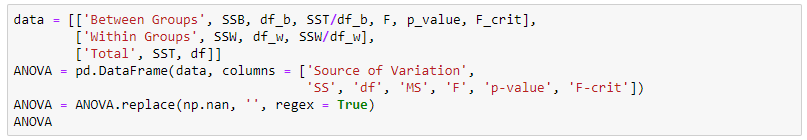

In [23]:
data = [['Between Groups', SSB, df_b, SST/df_b, F, p_value, F_crit],
        ['Within Groups', SSW, df_w, SSW/df_w],
        ['Total', SST, df]]
ANOVA = pd.DataFrame(data, columns = ['Source of Variation', 
                                      'SS', 'df', 'MS', 'F', 'p-value', 'F-crit'])
ANOVA = ANOVA.replace(np.nan, '', regex = True)
ANOVA

,Source of Variation,SS,df,MS,F,p-value,F-crit
0,Between Groups,1085.84,2,935.92,15.1962,7.15636e-05,3.44336
1,Within Groups,786.00,22,35.7273,,,
2,Total,1871.84,24,,,,


--- 
### Interpreting the results
#### Mean Squares
Recall that the null hypothesis is that all means are equal. 
If the null hypothesis is true then we would expect the Mean Squares Between to be about the same as the Mean Squares Within, which can be shown as $ F={\frac {\text{MSB}}{\text{MSW}}} \sim 1 $

If the alternate hypothesis is true (at least one mean differs) then $ F={\frac {\text{MSB}}{\text{MSW}}} > 1 $

In our example, the F-ratio value is 15.1962 is greater than 1. We reject the null hypothesis.

-----
#### F-critical
The F-critical value represents how likely the F-statistic is if there is no difference in the means (if the null hypothesis is true). F-critical is inverse cumulative probability - the shaded area in the tail of the probability distribution. In order for the null hypothesis to be true, F-statistic must be less than the F-critical value. If the F-statistic is greater than the F-critical value then the null hypothesis is rejected and one can conclude that not all means are equal.

In our example:
 - F-critical = 3.44336
 - F-statistic = 15.1962

The F-statistic is not less than F-critical. We reject the null hypothesis.

-----
#### P-value
P-value explains the probability of getting the F-statistic value (or an even larger value). In order for the null hypothesis to be true, p-value must be greater than the significance level. If the p-value is less than or equal to the significance level then the null hypothesis is rejected and one can conclude that not all means are equal. 

In our example, the p-value is 7.15636e-05. At first glance, it might might look like it is larger than 0.05, but the number is displayed in exponential notation (that's the _e_ ), which represents 7.15636 x 10 to the power of -5. The number is 0.0000715636 or 0.00715636% so the probability is less than 0.05 or 5%.

The p-value is not greater than the significance level. We reject the null hypothesis.



In [24]:
# add a comment to indicate how we determine if we reject or accept the null hypothesis


You have completed the tutorial. Download this completed notebook and upload to the Teams Assignment to mark it as complete. 
#### File > Download as > Notebook (.ipynb)